In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from collections import defaultdict
sns.set_style("darkgrid")


In [2]:
params = {'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large'}       ###'axes.titlesize':'xx-large'
pylab.rcParams.update(params)

In [3]:
# create a dictionary for easy access to data sets
d = {'L':'linear', 'CO':'cosine', 'C':'clustered'}
rf_df = defaultdict(list)

for key,value in d.items():
    df = pd.read_csv('/Users/zihaoxu/R_repos/BLB-RF-Sim/CSV/MSE~s_'+value+'.csv')
    df.drop('Unnamed: 0', axis = 1, inplace = True)
    rf_df['type'].append(value)
    rf_time = df.loc[len(df)-1,'time']
    rf_MSE = df.loc[len(df)-1,'MSE']
    rf_df['rf_time'].append(rf_time)
    rf_df['rf_MSE'].append(rf_MSE)
    df.drop(len(df)-1, axis = 0, inplace = True)
    df['time'] = df['time']/rf_time
    df['MSE'] = df['MSE']/rf_MSE
    df['data_type'] = value
    d[key] = df

In [29]:
# plot the RMSE~s graph on a given ax, with a given data structure
def plot_on_ax(ax, df):
    # Find the point at which the MSE converges
    def findStopMSE(df):
        index_to_be_used = []
        for ga in df['gamma'].unique():
            ga_df = df[df.gamma==ga]
            ga_index = list(ga_df.index)
            for ind in ga_index:
                if ind == min(ga_index):
                    index_to_be_used.append(ind) 
                else:
                    pct_change = (ga_df.loc[ind,'MSE'] - ga_df.loc[ind-1,'MSE']) / ga_df.loc[ind-1,'MSE']
                    if pct_change <= -0.01:
                        index_to_be_used.append(ind)
                    else:
                        break
                      
        new = df.loc[index_to_be_used, :]
        new.index = range(len(new))
        return(new)
    stop_df = findStopMSE(df)

    color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'orange',1:'orange'}
    for ga in stop_df['gamma'].unique():
        temp = stop_df[stop_df['gamma']==ga]
        minMSE = min(temp.MSE)
        minRow = temp[temp.MSE==minMSE]
        ax.scatter(minRow['s'], minRow['MSE'], c = color_dict[ga], marker = 's', label = None)

    for ga in df['gamma'].unique():
        temp = df[(df['gamma']==ga) & (df.ntree==500)]
        ax.semilogy(temp['s'], temp['MSE'], c = color_dict[ga], label = "gamma = " + str(ga))
    if df['data_type'][0]=='linear':
        ax.legend(loc = 1)
    elif df['data_type'][0]=='cosine':
        ax.set_xlabel('s (number of Little Random Forests)')
        ax.set_ylim(0,25)
    else:
        ax.set_ylabel('RMSE')
    #ax.legend(loc = 1)
    #ax.set_xlabel('s (number of Little Random Forests)')
    #ax.set_ylabel('RMSE')
    ax.set_title(str(df['data_type'][0]) + ', n = 10000')
    ax.axhline(1,0,18,c='grey', linestyle = 'dashed', alpha = .5)
    sns.despine()

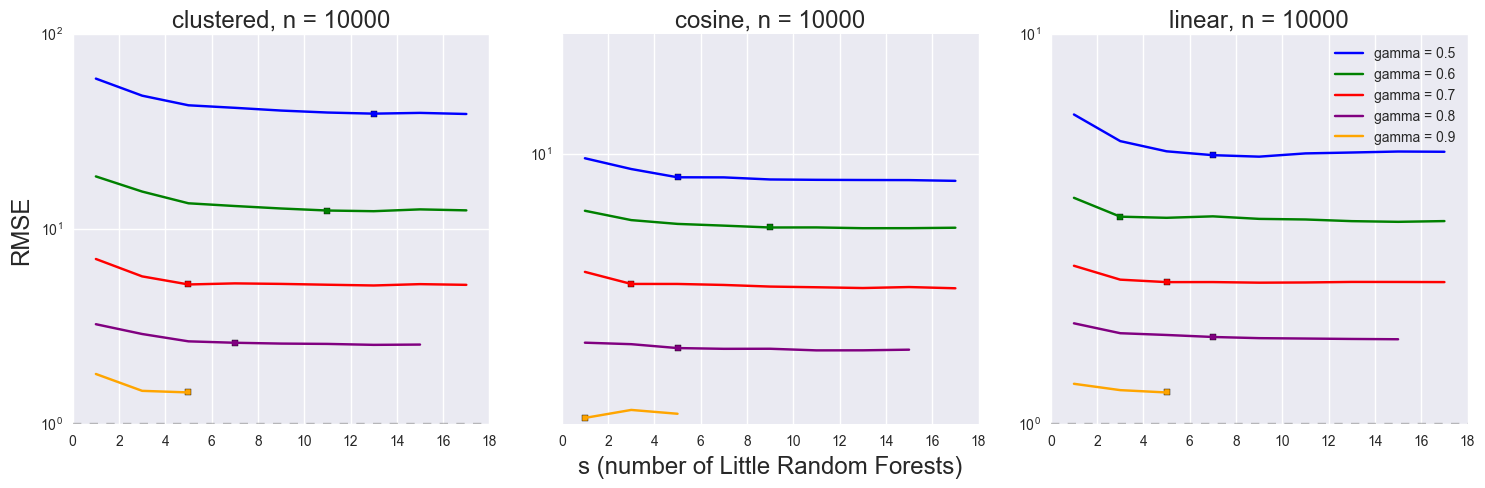

In [30]:
# Figure: MSE ~ s for three data structures

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (15,5))
plot_on_ax(ax1, d['C'])
plot_on_ax(ax2, d['CO'])
plot_on_ax(ax3, d['L'])
plt.tight_layout()

fig
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~s.png', dpi = 300, fmt = 'png')

In [15]:
name_list = {'L':'linear', 'CO':'cosine', 'C':'clustered'}
for key,value in name_list.items():
    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    plot_on_ax(ax1, d[key])
    fig
    #plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~s_'+value+'.png', dpi = 300, fmt = 'png')

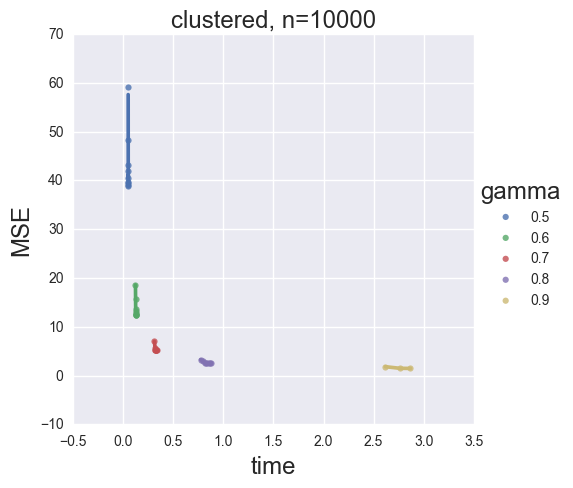

In [5]:
sns.lmplot(x = 'time', y = 'MSE', hue = 'gamma', data = d['C'] , col = 'ntree',lowess=True)
#plt.xlim(-15, 250)
#plt.ylim(-4, 160)
plt.title('clustered, n=10000')
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~time_clustered.png', dpi = 300, fmt = 'png')
plt.show()

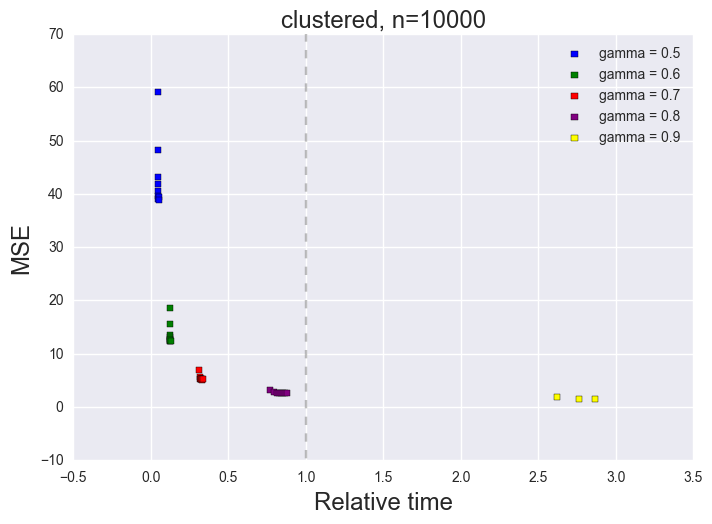

In [20]:
plt.figure()
df = d['C']
symbol_list = ['o', 'v', ]
color_dict = {.5:'blue', .6:'g', .7:'r', .8:'purple', .9:'yellow',1:'yellow'}
marker_dict = {100:'o', 300: '*', 500:'s'}
for ga in df['gamma'].unique():
    for ntree in df['ntree'].unique():
        temp = df[(df['gamma']==ga) & (df['ntree']==ntree)]
        plt.scatter(temp['time'], temp['MSE'], c = color_dict[ga], marker = marker_dict[ntree], label = "gamma = " + str(ga))
plt.legend(loc = 1)
plt.xlabel('Relative time')
plt.ylabel('MSE')
plt.axvline(1, -10, 70, c='grey',linestyle = 'dashed', alpha = .5)
plt.title('clustered, n=10000')
sns.despine()
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MSE~time_clustered.png', dpi = 300, fmt = 'png')
plt.show()

In [44]:
new_df = defaultdict(list)
for ga in df['gamma'].unique():
    temp = df[df.gamma==ga]
    minMSE = min(temp['MSE'])
    minRow = temp[temp.MSE==minMSE]
    new_df['gamma'].append(float(minRow['gamma']))
    new_df['MSE'].append(float(minRow['MSE']))

In [45]:
pd.DataFrame(new_df)

,MSE,gamma
0,100.520528,0.5
1,31.608313,0.6
2,13.413855,0.7
3,6.643500,0.8
4,3.743293,0.9


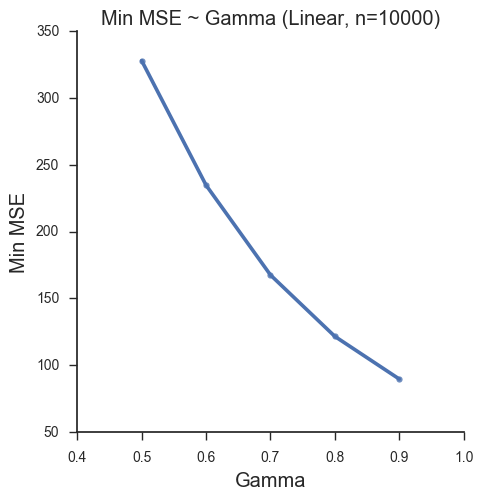

In [64]:
plt.figure()
color_dict = {.5:'y', .6:'orange', .7:'r', .8:'purple', .9:'b',1:'k'}
new_df = defaultdict(list)
for ga in df['gamma'].unique():
    temp = df[df.gamma==ga]
    minMSE = min(temp['MSE'])
    minRow = temp[temp.MSE==minMSE]
    new_df['gamma'].append(float(minRow['gamma']))
    new_df['MSE'].append(float(minRow['MSE']))
    #plt.scatter(minRow['gamma'], minRow['MSE'], c = color_dict[ga], label = 'gamma = ' +str(ga),s = 40, marker='s')
new_df = pd.DataFrame(new_df)
sns.lmplot('gamma', 'MSE',data = new_df, lowess = True)
#sns.lmplot('gamma', 'MSE',data = new_df, hue = 'gamma',lowess = True)
plt.xlabel('Gamma')
plt.ylabel('Min MSE')
#plt.xlim(.46, .94)
#plt.ylim(-12,120)
plt.title('Min MSE ~ Gamma (Linear, n=10000)')
sns.despine()
#plt.savefig('/Users/zihaoxu/R_repos/BLB-RF-Sim/Plots/MinMSE~gamma_linear.png', dpi = 300, fmt = 'png')
plt.show()